In [1]:
%matplotlib notebook 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    import h5py
try:
    import awkward0 as awkward
except ModuleNotFoundError:
    import awkward

In [13]:
# folders = ['13July2021_DirtyDozen_SetVar_5_nodes_500_epochs_0.0001',
#            '13July2021_DirtyDozen_SetVar_20_nodes_500_epochs_0.0001',
folders = ['13July2021_DirtyDozen_SetVar_5_nodes_500_epochs_0.0001',
           '13July2021_DirtyDozen_SetVar_20_nodes_500_epochs_0.0001',
           '13July2021_DirtyDozen_SetVar_50_nodes_500_epochs_0.0001',
           '13July2021_DirtyDozen_SetVar_5to20_nodes_500_epochs_0.0001',
           '13July2021_DirtyDozen_SetVar_5to500_nodes_500_epochs_0.0001',
           '13July2021_DirtyDozen_SetVar_5to50_nodes_500_epochs_0.0001',
           '14July2021_DirtyDozen_SetVar_5to100_nodes_500_epochs_0.0001',
           '14July2021_DirtyDozen_SetVar_100_nodes_500_epochs_0.0001']



<IPython.core.display.Javascript object>


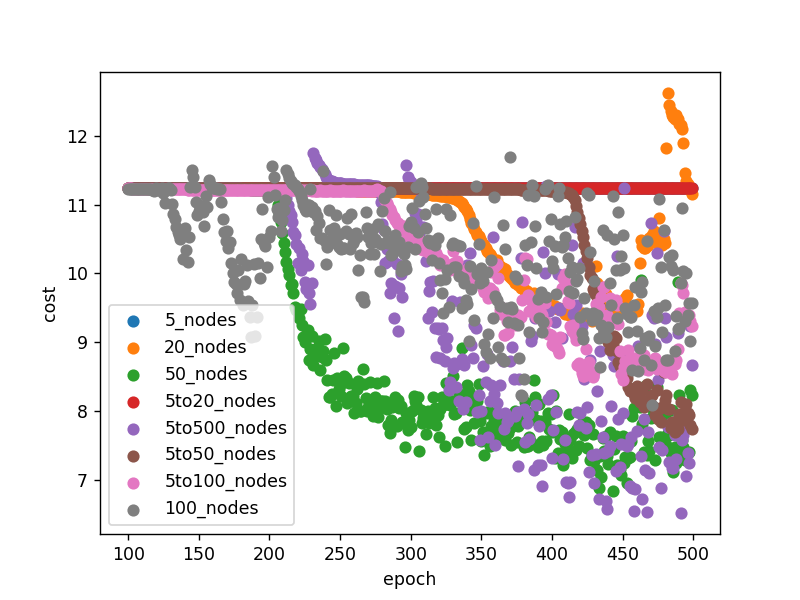

In [14]:
x = 'epoch'
y = 'cost'
e_range = (100, 500)
fig = plt.figure()
legender = []
data = {}
for folder in folders:
    fullpath = 'jgo_files/' + folder + '/' + folder + '_stats.hdf5'
    legender.append(folder[29:folder.index('nodes')+5])
    with h5py.File(fullpath, mode="r") as f:
        columns = []
        for i in np.asarray(f['results']['axis0']):
            columns.append(i.decode('UTF-8'))
        datum = pd.DataFrame(np.asarray(f['results']['block0_values']), columns = columns)
        plt.scatter(datum[x][e_range[0]:e_range[1]], datum[y][e_range[0]:e_range[1]])
        data[folder[29:folder.index('nodes')+5]] = datum
#plt.yscale("log")
plt.legend(legender)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

<IPython.core.display.Javascript object>


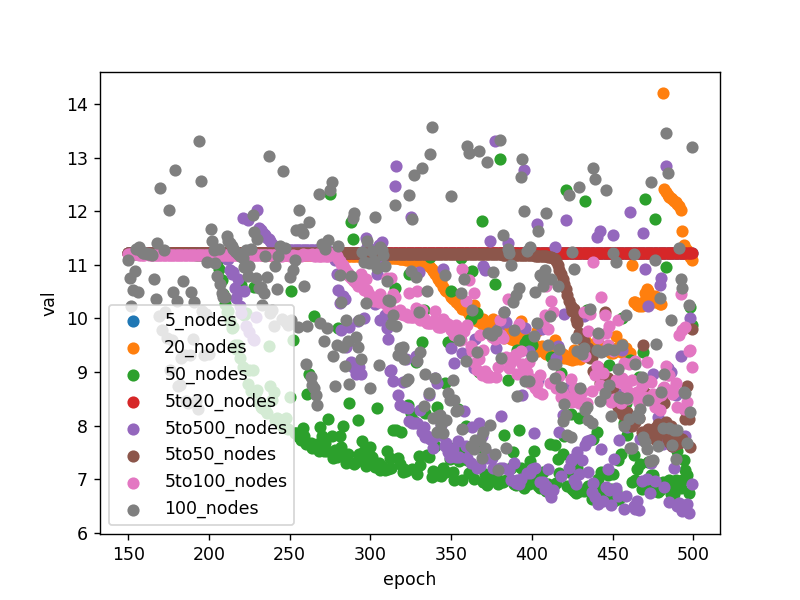

In [15]:
x = 'epoch'
y = 'val'
e_range = (150, 500)
fig = plt.figure()
legender = []
for folder in folders:
    fullpath = 'jgo_files/' + folder + '/' + folder + '_stats.hdf5'
    legender.append(folder[29:folder.index('nodes')+5])
    with h5py.File(fullpath, mode="r") as f:
        columns = []
        for i in np.asarray(f['results']['axis0']):
            columns.append(i.decode('UTF-8'))
        datum = pd.DataFrame(np.asarray(f['results']['block0_values']), columns = columns)
        plt.scatter(datum[x][e_range[0]:e_range[1]], datum[y][e_range[0]:e_range[1]])
#plt.yscale("log")
plt.legend(legender)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

In [6]:
len('02July2021_DirtyDozen_SetVar_')

29

In [7]:
# import os
# old = 50
# new = 100
# for i in range(500):
#     oldfolder = '14July2021_DirtyDozen_SetVar_' + str(old) + '_nodes_500_epochs_0.0001'
#     oldpath = 'jgo_files/' + oldfolder + '/' + oldfolder + '_' + str(i) + '.pyt'
#     newfolder = '14July2021_DirtyDozen_SetVar_' + str(new) + '_nodes_500_epochs_0.0001'
#     newpath = 'jgo_files/' + oldfolder + '/' + newfolder + '_' + str(i) + '.pyt'
#     try:
#         os.rename(oldpath, newpath)
#     except FileNotFoundError:
#         pass
        

In [16]:
print('Best Epochs:')
best = {}
for i in range(len(data)):
    index = folders[i][29:folders[i].index('nodes')+5]
    print(index)
    datum = data[index]
    bestcostind = int(datum['epoch'][datum['cost'] == np.min(datum['cost'])])
    bestcost = np.min(datum['cost'])
    print('By Train Cost   Index:', bestcostind, '  Cost:', bestcost)
    bestvalind = int(datum['epoch'][datum['val'] == np.min(datum['val'])])
    bestval = np.min(datum['val'])
    print('By Test Cost    Index:', bestvalind, '  Cost:', bestval)
    print()
    best[index] = bestvalind
    

Best Epochs:
5_nodes
By Train Cost   Index: 499   Cost: 11.237267199982988
By Test Cost    Index: 499   Cost: 11.212449550628662

20_nodes
By Train Cost   Index: 428   Cost: 9.306830005442842
By Test Cost    Index: 425   Cost: 9.232734978199005

50_nodes
By Train Cost   Index: 443   Cost: 6.84347646287147
By Test Cost    Index: 451   Cost: 6.583519995212555

5to20_nodes
By Train Cost   Index: 499   Cost: 11.242476006771655
By Test Cost    Index: 499   Cost: 11.216906130313873

5to500_nodes
By Train Cost   Index: 491   Cost: 6.516247571782863
By Test Cost    Index: 497   Cost: 6.368043303489685

5to50_nodes
By Train Cost   Index: 487   Cost: 7.6988636754083295
By Test Cost    Index: 498   Cost: 7.596606761217117

5to100_nodes
By Train Cost   Index: 450   Cost: 8.45335236001522
By Test Cost    Index: 479   Cost: 8.283108979463577

100_nodes
By Train Cost   Index: 471   Cost: 8.086590323887819
By Test Cost    Index: 379   Cost: 7.17996871471405

